In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import astropy.units as u # I use astropy units in everything, very helpful for bookkeeping/debugging

from lim import lim # The base intensity mapping object

matplotlib.rcParams.update({'font.size': 18,'figure.figsize':[8,7]}) # Make figures better
#matplotlib.rcParams,update({}'figure.figsize'] = [8,7]
from scipy.ndimage import gaussian_filter

## Redshift Interpolator

In [2]:
from astropy.cosmology import WMAP9 as cosmo
import scipy as sp
from scipy import interpolate

In [14]:
z_mesh = np.linspace(0, 6, 600)

In [15]:
comov_mesh = cosmo.comoving_distance(z_mesh).value

Text(0.5, 0, 'Comoving Distance [Mpc]')

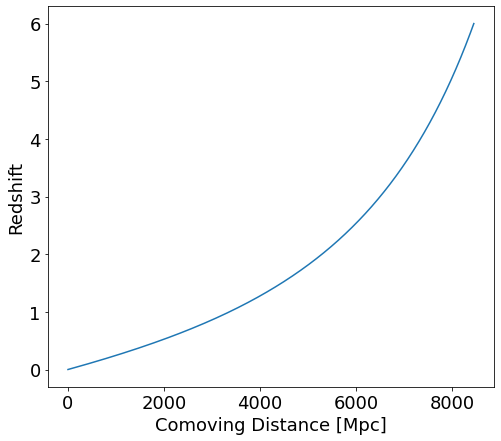

In [31]:
plt.plot(comov_mesh, z_mesh)
plt.ylabel('Redshift')
plt.xlabel('Comoving Distance [Mpc]')

In [25]:
f = interpolate.interp1d(comov_mesh, z_mesh)
comov_arr = np.linspace(0, 8000, 25)

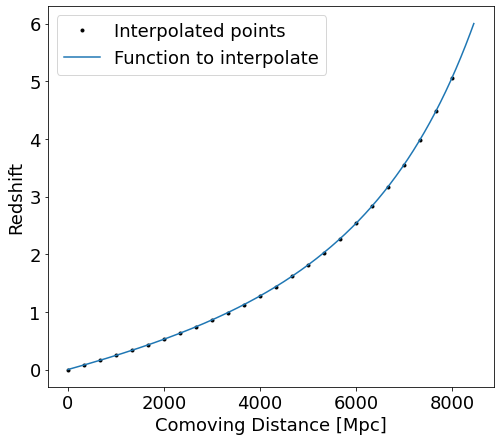

In [30]:
plt.plot(comov_arr, f(comov_arr), '.k', label = 'Interpolated points')
plt.plot(comov_mesh, z_mesh, label = 'Function to interpolate')
plt.ylabel('Redshift')
plt.xlabel('Comoving Distance [Mpc]')
plt.legend()

## Running Nate Sims through `limlam_mocker`

In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import astropy.units as u # I use astropy units in everything, very helpful for bookkeeping/debugging

from lim import lim # The base intensity mapping object

matplotlib.rcParams.update({'font.size': 18,'figure.figsize':[8,7]}) # Make figures better
#matplotlib.rcParams,update({}'figure.figsize'] = [8,7]
from scipy.ndimage import gaussian_filter

In [2]:
# Initialize LineModel with default model
m = lim()
m_co_gauss = lim('TonyLi_PhI', doSim = True)

Input cosmological model does not match simulations
Setting analytic cosmology to match simulation


In [3]:
m_co_ngauss = lim('TonyLi_PhII', doSim = True)

Input cosmological model does not match simulations
Setting analytic cosmology to match simulation


In [4]:
map_zs = (m_co_gauss.mapinst.nu_rest/m_co_gauss.mapinst.nu_bincents) - 1

### With Adapted $\Omega_{field}$

$tan(\theta) = x/d$, where $\theta$ = angular size of object on the sky, $x$ = size of the object and $d$ = its distance

$x$ = 1 GPc, $d$ = 6.5 Gpc, so $\theta$ ~ 0.15 rad ~ 9 deg

so $\Omega_{field}$ ~ 81 deg²

- Gaussian Case

In [5]:
gauss_map = m_co_gauss.maps

Loading .npz catalogues...


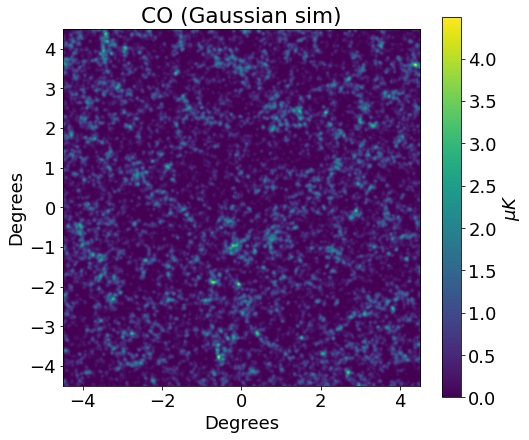

In [10]:
plt.imshow(gaussian_filter(gauss_map[:, :, 5], 5), extent = [-4.5, 4.5, -4.5, 4.5])
plt.xlabel('Degrees')
plt.ylabel('Degrees')
plt.title('CO (Gaussian sim)')
plt.colorbar(label = r'$\mu K$')

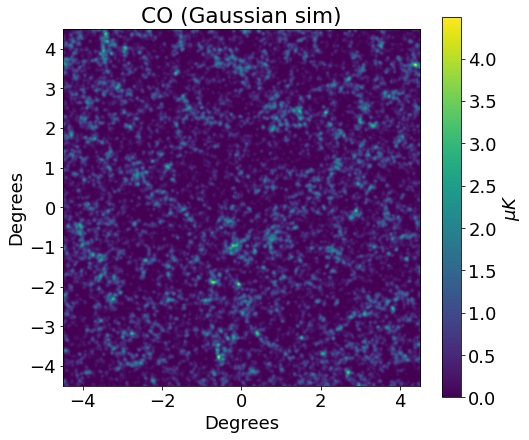

In [6]:
plt.imshow(gaussian_filter(gauss_map[:, :, 5], 5), extent = [-4.5, 4.5, -4.5, 4.5])
plt.xlabel('Degrees')
plt.ylabel('Degrees')
plt.title('CO (Gaussian sim)')
plt.colorbar(label = r'$\mu K$')

- Non-Gaussian; Instability

In [6]:
ngauss_map = m_co_ngauss.maps

Loading .npz catalogues...


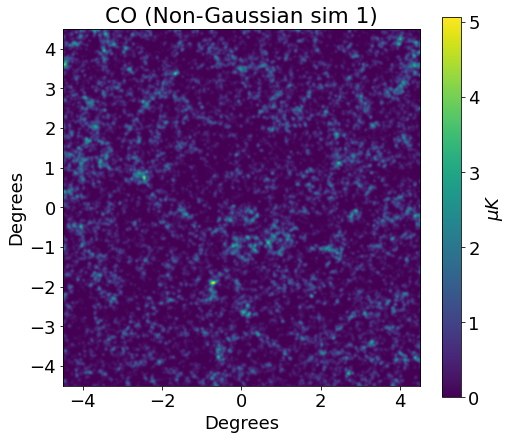

In [8]:
plt.imshow(gaussian_filter(ngauss_map[:, :, 5], 5), extent = [-4.5, 4.5, -4.5, 4.5])
plt.xlabel('Degrees')
plt.ylabel('Degrees')
plt.title('CO (Non-Gaussian sim 1)')
plt.colorbar(label = r'$\mu K$')

- Difference

In [20]:
diff = ngauss_map - gauss_map

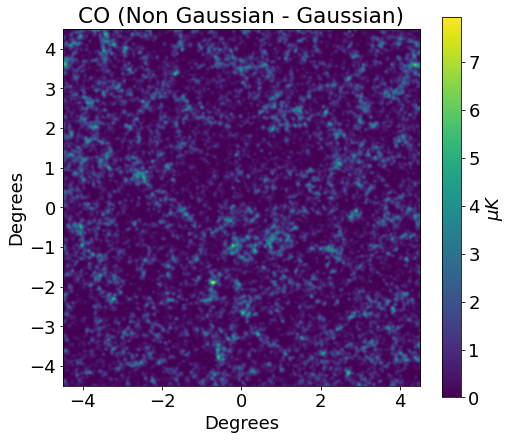

In [23]:
plt.imshow(gaussian_filter(np.abs(diff[:, :, 5]), 5), extent = [-4.5, 4.5, -4.5, 4.5])
plt.xlabel('Degrees')
plt.ylabel('Degrees')
plt.title('CO (Non Gaussian - Gaussian)')
plt.colorbar(label = r'$\mu K$')

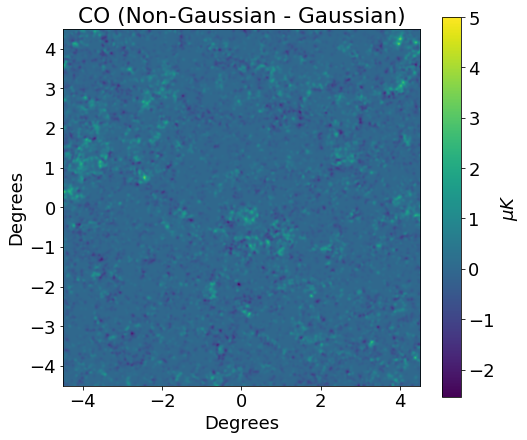

In [24]:
plt.imshow(gaussian_filter(diff[:, :, 5], 5), vmax = 5, extent = [-4.5, 4.5, -4.5, 4.5])
plt.ylabel('Degrees')
plt.xlabel('Degrees')
plt.title('CO (Non-Gaussian - Gaussian)')
plt.colorbar(label = r'$\mu K$')
#plt.savefig('diff_co.png', bbox_inches = "tight")

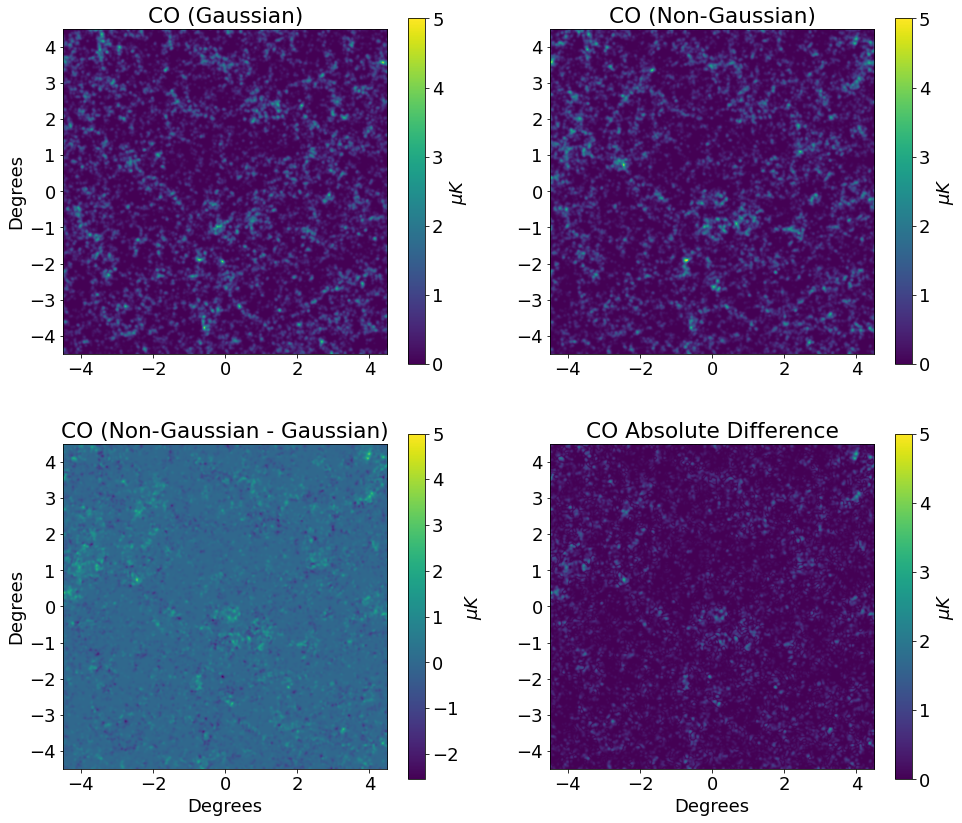

In [28]:
fig , axes = plt.subplots(nrows = 2, ncols = 2, figsize = (16, 14))

plt.subplot(221)
plt.imshow(gaussian_filter(gauss_map[:, :, 5], 5), vmax = 5, extent = [-4.5, 4.5, -4.5, 4.5])
plt.ylabel('Degrees')
plt.title('CO (Gaussian)')
plt.colorbar(label = r'$\mu K$')

plt.subplot(222)
plt.imshow(gaussian_filter(ngauss_map[:, :, 5], 5), vmax = 5, extent = [-4.5, 4.5, -4.5, 4.5])
plt.title('CO (Non-Gaussian)')
plt.colorbar(label = r'$\mu K$')

plt.subplot(223)
plt.imshow(gaussian_filter((diff[:, :, 5]), 5), vmax = 5, extent = [-4.5, 4.5, -4.5, 4.5])
plt.xlabel('Degrees')
plt.ylabel('Degrees')
plt.title('CO (Non-Gaussian - Gaussian)')
plt.colorbar(label = r'$\mu K$')

plt.subplot(224)
plt.imshow(np.abs(gaussian_filter(diff[:, :, 5], 5)), vmax = 5, extent = [-4.5, 4.5, -4.5, 4.5])
plt.xlabel('Degrees')
plt.title('CO Absolute Difference')
plt.colorbar(label = r'$\mu K$')

### Power Spectra

In [16]:
gauss_pk = m_co_gauss.Pk_sim

In [17]:
ngauss_pk = m_co_ngauss.Pk_sim
k = m_co_gauss.k_sim

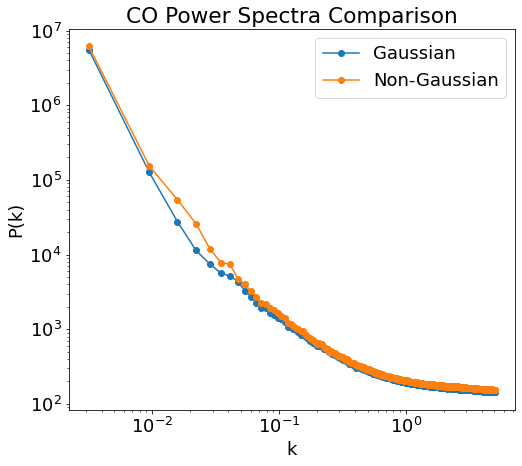

In [29]:
plt.plot(k, gauss_pk, '-o', label = 'Gaussian')
plt.plot(k, ngauss_pk, '-o', label = 'Non-Gaussian')
plt.xlabel('k')
plt.ylabel('P(k)')
plt.title('CO Power Spectra Comparison')
plt.xscale('log')
plt.yscale('log')
plt.legend()
#plt.savefig('pspecs_comparison.png', bbox_inches = 'tight')

In [31]:
gauss_pk.unit

Unit("Mpc3 uK2")

In [30]:
from limlam_mocker.limlam_mocker import redshift_to_chi as rtc
from limlam_mocker.limlam_mocker import load_peakpatch_catalogue_cosmo as lppcc

x,y,z = m_co_gauss.mapinst.pix_binedges_x, m_co_gauss.mapinst.pix_binedges_y, m_co_gauss.mapinst.nu_binedges
t     = diff
cosmo = lppcc(m_co_gauss.halo_info)
zco   = rtc(m_co_gauss.mapinst.nu_rest/z - 1, cosmo)

avg_ctd = np.mean(zco)
xco     = x/(180)*np.pi*avg_ctd
yco     = y/(180)*np.pi*avg_ctd

dxco, dyco, dzco = [np.abs(np.mean(np.diff(d))) for d in (xco, yco, zco)]
Pk_3D            = np.abs(np.fft.rfftn(t)*dxco*dyco*dzco)**2/np.abs(np.ptp(xco)*np.ptp(yco)*np.ptp(zco))

kx        = 2*np.pi*np.fft.fftfreq(xco.size - 1, d = dxco)
ky        = 2*np.pi*np.fft.fftfreq(yco.size - 1, d = dyco)
kz        = 2*np.pi*np.fft.rfftfreq(zco.size - 1, d = dzco)

kgrid     = np.sqrt(sum(ki**2 for ki in np.meshgrid(kx, ky, kz, indexing = 'ij')))
dk        = max(np.diff(kx)[0], np.diff(ky)[0], np.diff(kz)[0])

kmax_dk   = int(np.ceil(max(np.amax(kx), np.amax(ky), np.amax(kz))/dk))
kbins     = np.linspace(0, kmax_dk*dk, kmax_dk + 1)

Pk_nmodes = np.histogram(kgrid[kgrid > 0], bins = kbins, weights = Pk_3D[kgrid > 0])[0]
nmodes    = np.histogram(kgrid[kgrid > 0], bins = kbins)[0]

Pk_diff = Pk_nmodes/nmodes
k_diff  = (kbins[1:] + kbins[:-1])/2

In [ ]:
plt.plot(k, gauss_pk, label = 'Gaussian')
plt.plot(k, ngauss_pk, label = 'Non-Gaussian')
plt.plot(k_diff, Pk_diff, label = 'Difference')
plt.xlabel('k')
plt.ylabel('P(k)')
plt.title('CO Power Spectra Comparison')
plt.xscale('log')
plt.yscale('log')
plt.legend()

- Gaussian Lightcone path:

/mnt/scratch-lustre/njcarlson/peak-patch-runs/23.02.05_SBsuite/ng0/cenz6500Mpc/output/1000Mpc_n580_nb40_nt2_merge.npz

- Non-Gaussian, case 1

mnt/scratch-lustre/njcarlson/peak-patch-runs/23.02.05_SBsuite/ng7_m25/cenz6500Mpc/output/1000Mpc_n580_nb40_nt2_merge.npz

## May Runs

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import astropy.units as u # I use astropy units in everything, very helpful for bookkeeping/debugging

from lim import lim # The base intensity mapping object

matplotlib.rcParams.update({'font.size': 18,'figure.figsize':[8,7]}) # Make figures better
#matplotlib.rcParams,update({}'figure.figsize'] = [8,7]
from scipy.ndimage import gaussian_filter

In [2]:
# Initialize LineModel with default model
m = lim()
m_co_gauss = lim('TonyLi_PhI', doSim = True)

Input cosmological model does not match simulations
Setting analytic cosmology to match simulation


In [3]:
m_co_ngauss = lim('TonyLi_PhII', doSim = True)

Input cosmological model does not match simulations
Setting analytic cosmology to match simulation


In [4]:
gauss_map = m_co_gauss.maps

Loading .npz catalogues...


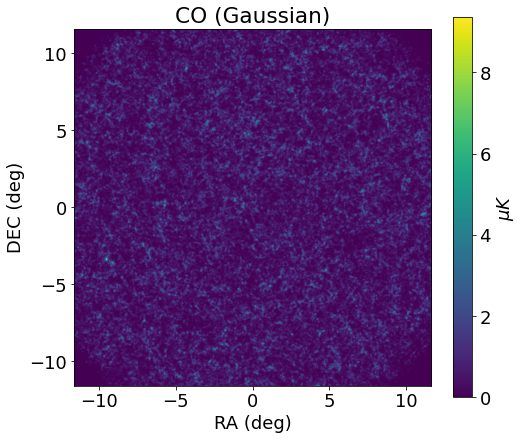

In [5]:
plt.imshow(gaussian_filter(gauss_map[:, :, 5], 5), extent = [-11.6, 11.6, -11.6, 11.6])
plt.xlabel('RA (deg)')
plt.ylabel('DEC (deg)')
plt.title('CO (Gaussian)')
plt.colorbar(label = r'$\mu K$')

In [ ]:
gauss_map_2 = m_co_ngauss.maps

In [ ]:
plt.imshow(gaussian_filter(gauss_map_2[:, :, 5], 5), extent = [-11.6, 11.6, -11.6, 11.6])
plt.xlabel('RA (deg)')
plt.ylabel('DEC (deg)')
plt.title('CO (Gaussian, v2)')
plt.colorbar(label = r'$\mu K$')

## New Runs -- May 5

In [2]:
# Initialize LineModel with default model
m = lim()
m_cii_gauss = lim('Lichen_v4', doSim = True)

Input cosmological model does not match simulations
Setting analytic cosmology to match simulation


In [3]:
gauss_map = m_cii_gauss.maps

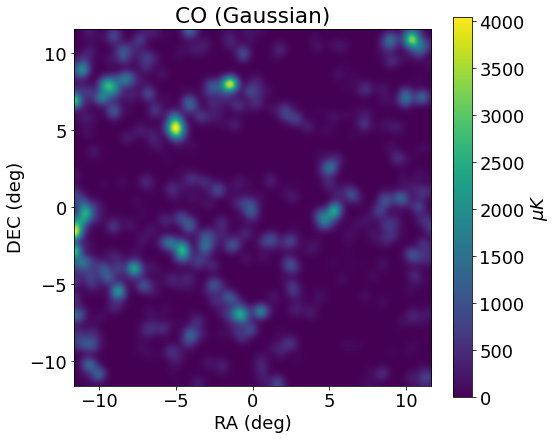

In [12]:
plt.imshow(gaussian_filter(gauss_map[:, :, 5], 5), extent = [-11.6, 11.6, -11.6, 11.6])
plt.xlabel('RA (deg)')
plt.ylabel('DEC (deg)')
plt.title('CO (Gaussian)')
plt.colorbar(label = r'$\mu K$')

In [8]:
m_cii_ngauss = lim('Lichen_v4', doSim = True)

Input cosmological model does not match simulations
Setting analytic cosmology to match simulation


In [9]:
m_cii_ngauss.update(catalogue_file = '/mnt/scratch-lustre/horlaville/nate_sims/may_5/ngaussian/ngaussian_lc_mlambda10.npz')

In [10]:
ngauss_map = m_cii_ngauss.maps

Loading .npz catalogues...


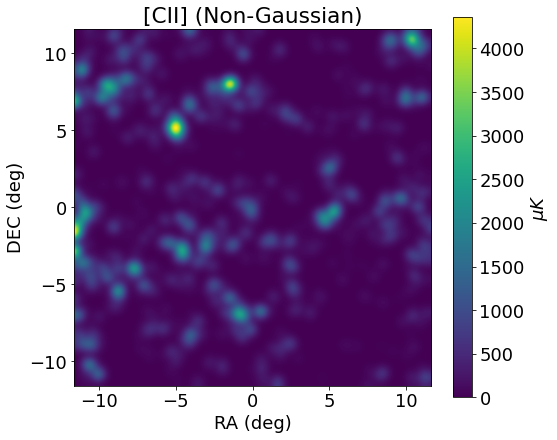

In [16]:
plt.imshow(gaussian_filter(ngauss_map[:, :, 5], 5), extent = [-11.6, 11.6, -11.6, 11.6])
plt.xlabel('RA (deg)')
plt.ylabel('DEC (deg)')
plt.title('[CII] (Non-Gaussian)')
plt.colorbar(label = r'$\mu K$')

In [17]:
diff_map = ngauss_map - gauss_map

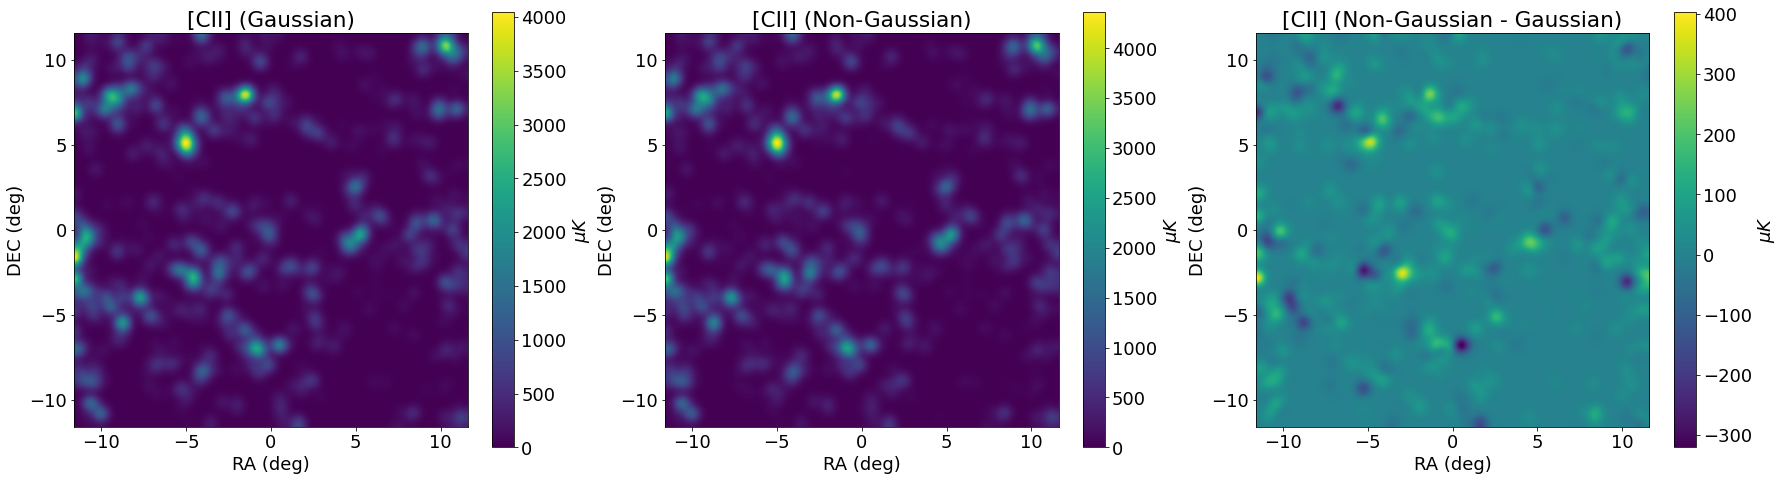

In [18]:
fig , axes = plt.subplots(nrows = 1, ncols = 3, figsize = (30, 8))

plt.subplot(131)
plt.imshow(gaussian_filter(gauss_map[:, :, 5], 5), extent = [-11.6, 11.6, -11.6, 11.6])
plt.xlabel('RA (deg)')
plt.ylabel('DEC (deg)')
plt.title('[CII] (Gaussian)')
plt.colorbar(label = 'Jy/sr')

plt.subplot(132)
plt.imshow(gaussian_filter(ngauss_map[:, :, 5], 5), extent = [-11.6, 11.6, -11.6, 11.6])
plt.xlabel('RA (deg)')
plt.ylabel('DEC (deg)')
plt.title('[CII] (Non-Gaussian)')
plt.colorbar(label = 'Jy/sr')

plt.subplot(133)
plt.imshow(gaussian_filter(diff_map[:, :, 5], 5), extent = [-11.6, 11.6, -11.6, 11.6])
plt.xlabel('RA (deg)')
plt.ylabel('DEC (deg)')
plt.title('[CII] (Non-Gaussian - Gaussian)')
plt.colorbar(label = 'Jy/sr')

Non-Gaussian file: /mnt/scratch-lustre/njcarlson/peak-patch-runs/23.04.29_LIM_production_runs/ng7_cenz7150Mpc_C_mlambda10/output/500Mpc_n432_nb74_nt3_merge.pksc.13579

Histograms

In [92]:
m_cii_gauss.update(tobs = 100000*u.h)

In [93]:
map_shape = gauss_map.shape
noise_sigma = m_cii_gauss.sigma_N

noise_map = np.random.normal(0, noise_sigma.to(u.Jy/u.sr, equivalencies=u.brightness_temperature(m_cii_gauss.nuObs)).value, map_shape)

In [94]:
gauss_forecast = gauss_map.value + noise_map

In [95]:
ngauss_forecast_m10 = ngauss_map.value + noise_map

Text(0.5, 1.0, 'Histogram of Intensities, tobs = 10000h')

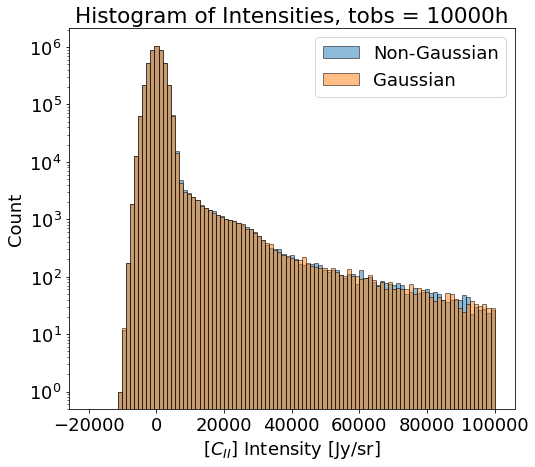

In [96]:
n_ng_10, bins, _ = plt.hist(ngauss_forecast_m10.flatten(), bins = np.linspace(-20000, 100000, 100), edgecolor = 'black', label = 'Non-Gaussian', alpha = 0.5)
n_g, _, _ = plt.hist(gauss_forecast.flatten(), bins = bins, edgecolor = 'black', label = 'Gaussian', alpha = 0.5)
plt.legend()

center = (bins[:-1] + bins[1:]) / 2


plt.xlabel(r'$[C_{II}]$ Intensity [Jy/sr]')
plt.ylabel('Count')
plt.yscale('log')
plt.title('Histogram of Intensities, tobs = 10000h')

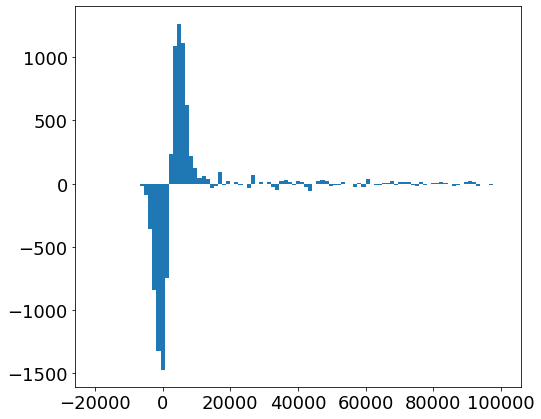

In [97]:
plt.fill_between(bins, np.concatenate(([0], n_ng_10 - n_g)), step="pre", label = 'Non-Gaussian - Gaussian')

/tmp/ipykernel_3310145/394961151.py:1: RuntimeWarning: invalid value encountered in divide
  plt.plot(center, np.log(n_ng_10/n_g))


Text(0.5, 0, '$[C_{II}]$ Intensity [Jy/sr]')

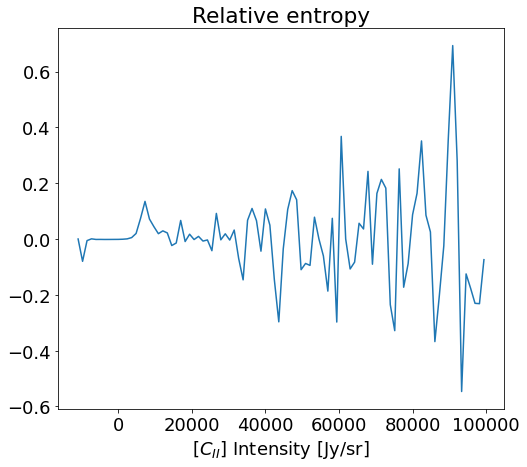

In [98]:
plt.plot(center, np.log(n_ng_10/n_g))
plt.title('Relative entropy')
plt.xlabel(r'$[C_{II}]$ Intensity [Jy/sr]')

/tmp/ipykernel_3310145/2823207751.py:1: RuntimeWarning: invalid value encountered in divide
  plt.plot(center, np.log(n_ng_10/n_g)*(n_ng_10))


Text(0.5, 0, '$[C_{II}]$ Intensity [Jy/sr]')

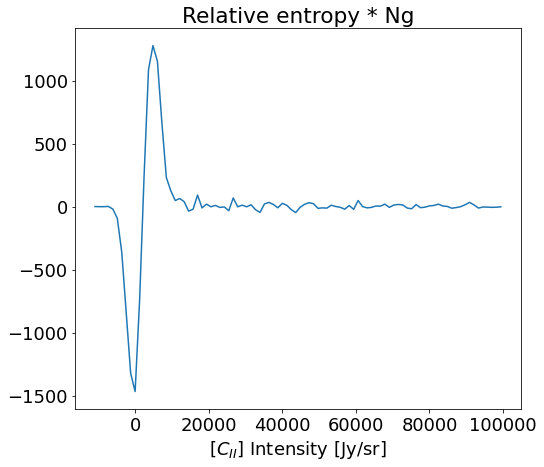

In [99]:
plt.plot(center, np.log(n_ng_10/n_g)*(n_ng_10))
plt.title('Relative entropy * Ng')
plt.xlabel(r'$[C_{II}]$ Intensity [Jy/sr]')

Varying $m_\lambda$:

In [57]:
ngauss_map_m10 = ngauss_map

In [60]:
ngauss_forecast_m10 = ngauss_map_m10.value + noise_map

In [58]:
m_cii_ngauss.update(catalogue_file = '/mnt/scratch-lustre/horlaville/nate_sims/may_5/ngaussian/ngaussian_lc_mlambda20.npz')

In [59]:
ngauss_map_m20 = m_cii_ngauss.maps

Loading .npz catalogues...


In [61]:
ngauss_map_m20 = m_cii_ngauss.maps
ngauss_forecast_m20 = ngauss_map_m20.value + noise_map

Text(0.5, 1.0, 'Histogram of Intensities, tobs = 10000h')

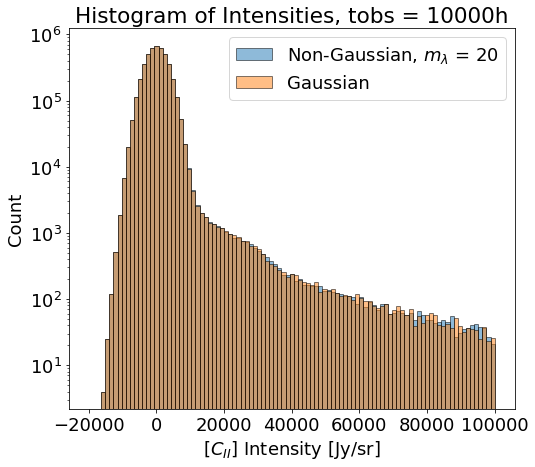

In [65]:
n_ng_20, bins, _ = plt.hist(ngauss_forecast_m20.flatten(), bins = np.linspace(-20000, 100000, 100), edgecolor = 'black', label = r'Non-Gaussian, $m_\lambda$ = 20', alpha = 0.5)
n_g, _, _ = plt.hist(gauss_forecast.flatten(), bins = bins, edgecolor = 'black', label = 'Gaussian', alpha = 0.5)
plt.legend()

center = (bins[:-1] + bins[1:]) / 2


plt.xlabel(r'$[C_{II}]$ Intensity [Jy/sr]')
plt.ylabel('Count')
plt.yscale('log')
plt.title('Histogram of Intensities, tobs = 10000h')

In [71]:
plt.plot(bins, np.concatenate(([0], n_ng_20 - n_g)), step="pre")
plt.title(r'Non-Gaussian - Gaussian, $m_\lambda$ = 20')
plt.xlabel(r'$[C_{II}]$ Intensity [Jy/sr]')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

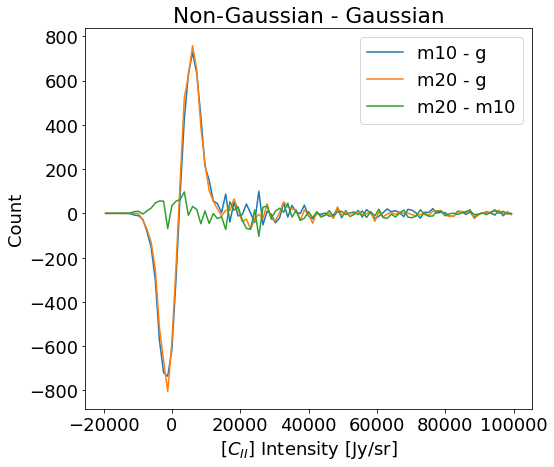

In [72]:
plt.plot(center, n_ng_10 - n_g, label = 'm10 - g')
plt.plot(center, n_ng_20 - n_g, label = 'm20 - g')
plt.plot(center, n_ng_20 - n_ng_10, label = 'm20 - m10')
plt.title(r'Non-Gaussian - Gaussian')
plt.xlabel(r'$[C_{II}]$ Intensity [Jy/sr]')
plt.ylabel('Count')
plt.legend()

In [73]:
plt.plot(center, np.log(n_ng_10/n_g), label = 'm10/g')
plt.plot(center, np.log(n_ng_20/n_g), label = 'm20/g')
plt.plot(center, np.log(n_ng_20/n_ng_10), label = 'm20/m10')
plt.title(r'log ratio')
plt.xlabel(r'$[C_{II}]$ Intensity [Jy/sr]')
plt.legend()

/tmp/ipykernel_3310145/885144325.py:1: RuntimeWarning: invalid value encountered in divide
  plt.plot(center, np.log(n_ng_10/n_g), label = 'm10/g')
/tmp/ipykernel_3310145/885144325.py:2: RuntimeWarning: invalid value encountered in divide
  plt.plot(center, np.log(n_ng_20/n_g), label = 'm20/g')
/tmp/ipykernel_3310145/885144325.py:3: RuntimeWarning: invalid value encountered in divide
  plt.plot(center, np.log(n_ng_20/n_ng_10), label = 'm20/m10')


In [74]:
diff_map_m = ngauss_map_m20.value - ngauss_map_m10.value

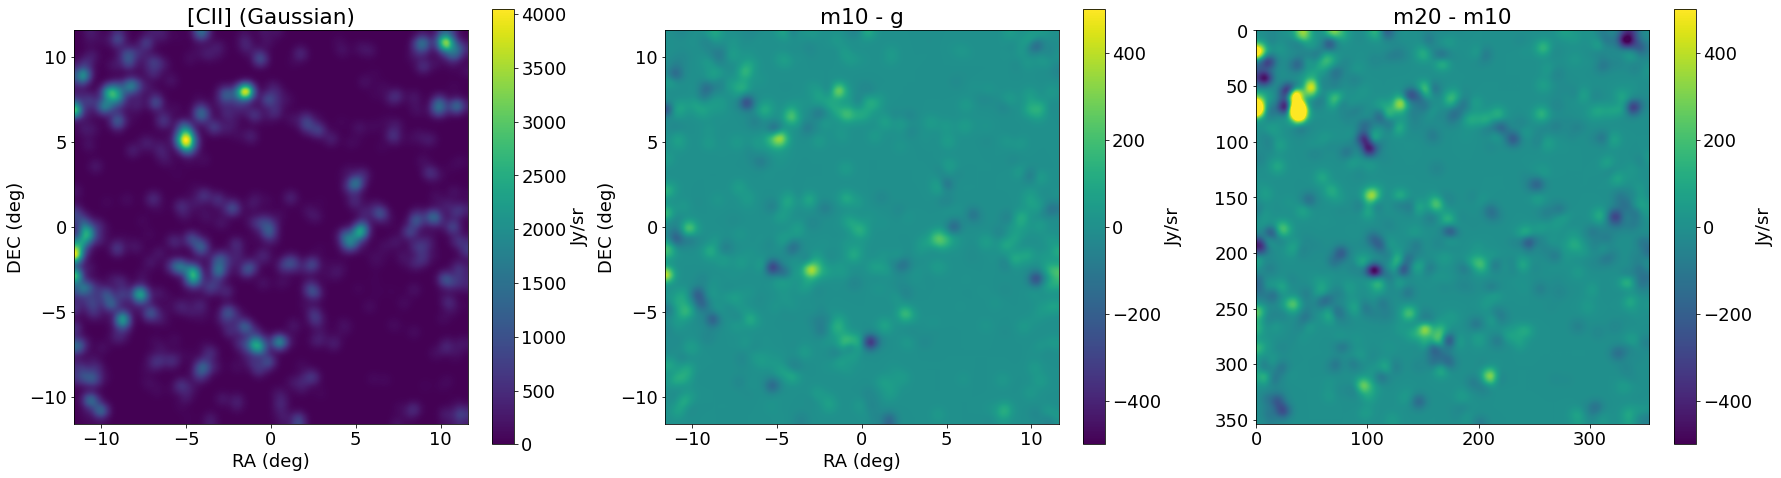

In [80]:
fig , axes = plt.subplots(nrows = 1, ncols = 3, figsize = (30, 8))

plt.subplot(131)
plt.imshow(gaussian_filter(gauss_map[:, :, 5], 5), extent = [-11.6, 11.6, -11.6, 11.6])
plt.xlabel('RA (deg)')
plt.ylabel('DEC (deg)')
plt.title('[CII] (Gaussian)')
plt.colorbar(label = 'Jy/sr')

plt.subplot(132)
plt.imshow(gaussian_filter(diff_map[:, :, 5], 5), extent = [-11.6, 11.6, -11.6, 11.6], vmin = -500, vmax = 500)
plt.xlabel('RA (deg)')
plt.ylabel('DEC (deg)')
plt.title('m10 - g')
plt.colorbar(label = 'Jy/sr')

plt.subplot(133)
plt.imshow(gaussian_filter(diff_map_m[:, :, 5], 5), vmin = -500, vmax = 500)
plt.title('m20 - m10')
plt.colorbar(label = 'Jy/sr')

m30:

In [81]:
m_cii_ngauss.update(catalogue_file = '/mnt/scratch-lustre/horlaville/nate_sims/may_5/ngaussian/ngaussian_lc_mlambda30.npz')

In [100]:
ngauss_map_m30 = m_cii_ngauss.maps
ngauss_forecast_m30 = ngauss_map_m30.value + noise_map

Text(0.5, 1.0, 'Histogram of Intensities, tobs = 100000h')

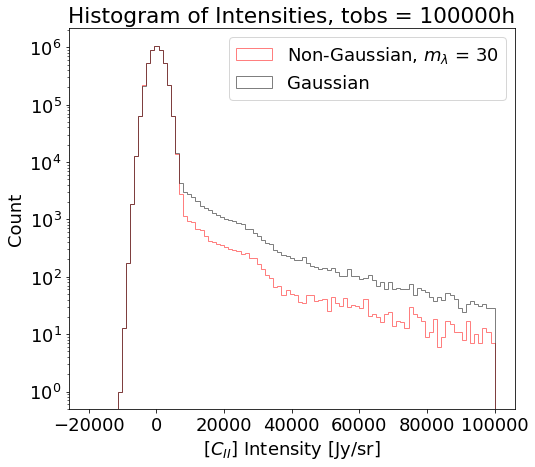

In [101]:
n_ng_30, bins, _ = plt.hist(ngauss_forecast_m30.flatten(), bins = np.linspace(-20000, 100000, 100), edgecolor = 'r', label = r'Non-Gaussian, $m_\lambda$ = 30', alpha = 0.5, histtype = 'step')
n_g, _, _ = plt.hist(gauss_forecast.flatten(), bins = bins, edgecolor = 'black', label = 'Gaussian', alpha = 0.5, histtype = 'step')
plt.legend()

center = (bins[:-1] + bins[1:]) / 2


plt.xlabel(r'$[C_{II}]$ Intensity [Jy/sr]')
plt.ylabel('Count')
plt.yscale('log')
plt.title('Histogram of Intensities, tobs = 100000h')

In [105]:
n_ng_30, bins, _ = plt.hist(ngauss_forecast_m30.flatten()/np.std(ngauss_forecast_m30.flatten()), bins = np.linspace(-5, 10, 100), edgecolor = 'r', label = r'Non-Gaussian (I/sigma), $m_\lambda$ = 30', alpha = 0.5, histtype = 'step')
n_g, _, _ = plt.hist(gauss_forecast.flatten()/np.std(gauss_forecast.flatten()), bins = bins, edgecolor = 'black', label = 'Gaussian (I/sigma)', alpha = 0.5, histtype = 'step')
plt.legend(bbox_to_anchor = (1, 1))

center = (bins[:-1] + bins[1:]) / 2


plt.xlabel(r'$[C_{II}]$ Intensity [Jy/sr]')
plt.ylabel('Count')
plt.yscale('log')
plt.title('Histogram of Intensities, tobs = 100000h')

Text(0.5, 1.0, 'Histogram of Intensities, tobs = 100000h')

Pipeline:

Setting up

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import astropy.units as u # I use astropy units in everything, very helpful for bookkeeping/debugging

from lim import lim # The base intensity mapping object

matplotlib.rcParams.update({'font.size': 18,'figure.figsize':[8,7]}) # Make figures better
#matplotlib.rcParams,update({}'figure.figsize'] = [8,7]
from scipy.ndimage import gaussian_filter

Gaussian signal cube:

In [2]:
# Initialize LineModel with default model
m = lim()
m_cii_gauss = lim('Lichen_v4', doSim = True)

Input cosmological model does not match simulations
Setting analytic cosmology to match simulation


In [3]:
gauss_map = m_cii_gauss.maps

Loading .npz catalogues...


Noise cube:

In [4]:
m_cii_gauss.update(tobs = 100000*u.h)

map_shape = gauss_map.shape
noise_sigma = m_cii_gauss.sigma_N

noise_map = np.random.normal(0, noise_sigma.to(u.Jy/u.sr, equivalencies=u.brightness_temperature(m_cii_gauss.nuObs)).value, map_shape)

Non-Gaussian signal cube:

In [5]:
m_cii_ngauss = lim('Lichen_v4', doSim = True)

Input cosmological model does not match simulations
Setting analytic cosmology to match simulation


In [6]:
m_cii_ngauss.update(catalogue_file = '/mnt/scratch-lustre/horlaville/nate_sims/may_5/ngaussian/ngaussian_lc_mlambda10.npz')

In [7]:
ngauss_map_m10 = m_cii_ngauss.maps

Loading .npz catalogues...


In [8]:
m_cii_ngauss.update(catalogue_file = '/mnt/scratch-lustre/horlaville/nate_sims/may_5/ngaussian/ngaussian_lc_mlambda20.npz')

In [9]:
ngauss_map_m20 = m_cii_ngauss.maps

Loading .npz catalogues...


In [10]:
m_cii_ngauss.update(catalogue_file = '/mnt/scratch-lustre/horlaville/nate_sims/may_5/ngaussian/ngaussian_lc_mlambda25.npz')

In [11]:
ngauss_map_m25 = m_cii_ngauss.maps

Loading .npz catalogues...


In [12]:
m_cii_ngauss.update(catalogue_file = '/mnt/scratch-lustre/horlaville/nate_sims/may_5/ngaussian/ngaussian_lc_mlambda30.npz')

In [13]:
ngauss_map_m30 = m_cii_ngauss.maps

Loading .npz catalogues...


Forecasts = signal + noise:

In [19]:
gauss_forecast = gauss_map.value + noise_map
ngauss_forecast_m10 = ngauss_map_m10.value + noise_map
ngauss_forecast_m20 = ngauss_map_m20.value + noise_map
ngauss_forecast_m25 = ngauss_map_m25.value + noise_map
ngauss_forecast_m30 = ngauss_map_m30.value + noise_map

Histograms:

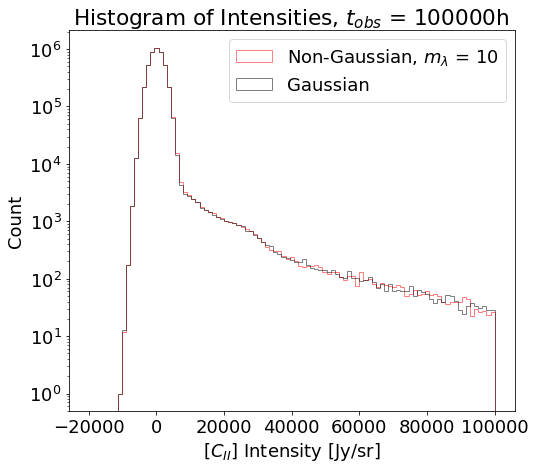

In [25]:
n_ng_10, bins, _ = plt.hist(ngauss_forecast_m10.flatten(), bins = np.linspace(-20000, 100000, 100), edgecolor = 'r', label = r'Non-Gaussian, $m_\lambda$ = 10', alpha = 0.5, histtype = 'step')
n_g, _, _ = plt.hist(gauss_forecast.flatten(), bins = bins, edgecolor = 'black', label = 'Gaussian', alpha = 0.5, histtype = 'step')
plt.legend()

center = (bins[:-1] + bins[1:]) / 2


plt.xlabel(r'$[C_{II}]$ Intensity [Jy/sr]')
plt.ylabel('Count')
plt.yscale('log')
plt.title(r'Histogram of Intensities, $t_{obs}$ = 100000h')
plt.savefig('may/histograms/m10.png')

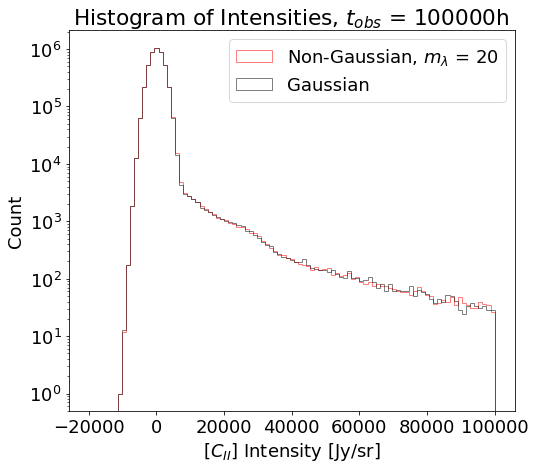

In [26]:
n_ng_20, bins, _ = plt.hist(ngauss_forecast_m20.flatten(), bins = np.linspace(-20000, 100000, 100), edgecolor = 'r', label = r'Non-Gaussian, $m_\lambda$ = 20', alpha = 0.5, histtype = 'step')
n_g, _, _ = plt.hist(gauss_forecast.flatten(), bins = bins, edgecolor = 'black', label = 'Gaussian', alpha = 0.5, histtype = 'step')
plt.legend()

center = (bins[:-1] + bins[1:]) / 2


plt.xlabel(r'$[C_{II}]$ Intensity [Jy/sr]')
plt.ylabel('Count')
plt.yscale('log')
plt.title(r'Histogram of Intensities, $t_{obs}$ = 100000h')
plt.savefig('may/histograms/m20.png')

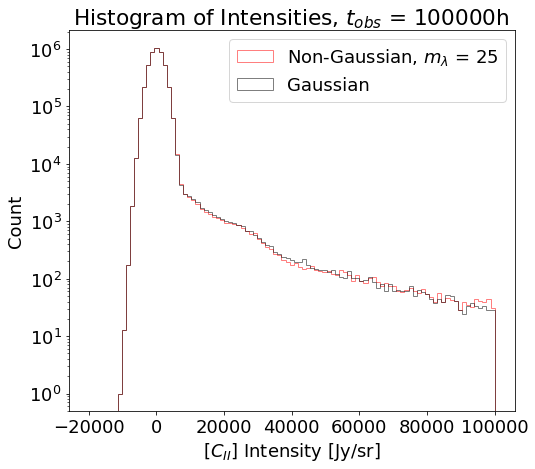

In [27]:
n_ng_25, bins, _ = plt.hist(ngauss_forecast_m25.flatten(), bins = np.linspace(-20000, 100000, 100), edgecolor = 'r', label = r'Non-Gaussian, $m_\lambda$ = 25', alpha = 0.5, histtype = 'step')
n_g, _, _ = plt.hist(gauss_forecast.flatten(), bins = bins, edgecolor = 'black', label = 'Gaussian', alpha = 0.5, histtype = 'step')
plt.legend()

center = (bins[:-1] + bins[1:]) / 2


plt.xlabel(r'$[C_{II}]$ Intensity [Jy/sr]')
plt.ylabel('Count')
plt.yscale('log')
plt.title(r'Histogram of Intensities, $t_{obs}$ = 100000h')
plt.savefig('may/histograms/m25.png')

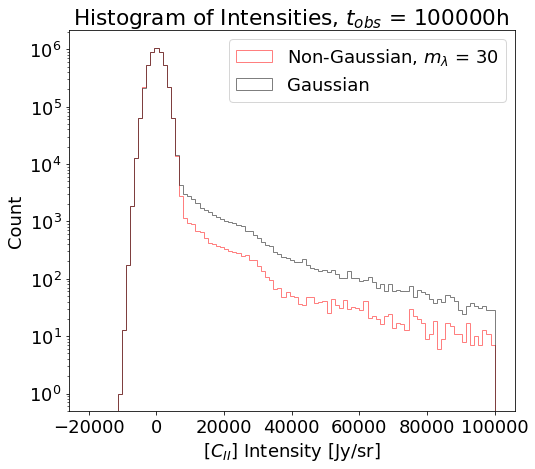

In [28]:
n_ng_30, bins, _ = plt.hist(ngauss_forecast_m30.flatten(), bins = np.linspace(-20000, 100000, 100), edgecolor = 'r', label = r'Non-Gaussian, $m_\lambda$ = 30', alpha = 0.5, histtype = 'step')
n_g, _, _ = plt.hist(gauss_forecast.flatten(), bins = bins, edgecolor = 'black', label = 'Gaussian', alpha = 0.5, histtype = 'step')
plt.legend()

center = (bins[:-1] + bins[1:]) / 2


plt.xlabel(r'$[C_{II}]$ Intensity [Jy/sr]')
plt.ylabel('Count')
plt.yscale('log')
plt.title(r'Histogram of Intensities, $t_{obs}$ = 100000h')
plt.savefig('may/histograms/m30.png')

Relative Entropy:

/tmp/ipykernel_3419399/1498537749.py:1: RuntimeWarning: invalid value encountered in divide
  plt.plot(center, np.log(n_ng_10/n_g), label = 'ln(m10/g)')
/tmp/ipykernel_3419399/1498537749.py:2: RuntimeWarning: invalid value encountered in divide
  plt.plot(center, np.log(n_ng_20/n_g), label = 'ln(m20/g)')
/tmp/ipykernel_3419399/1498537749.py:3: RuntimeWarning: invalid value encountered in divide
  plt.plot(center, np.log(n_ng_25/n_g), label = 'ln(m25/g)')
/tmp/ipykernel_3419399/1498537749.py:4: RuntimeWarning: invalid value encountered in divide
  plt.plot(center, np.log(n_ng_30/n_g), label = 'ln(m30/g)')


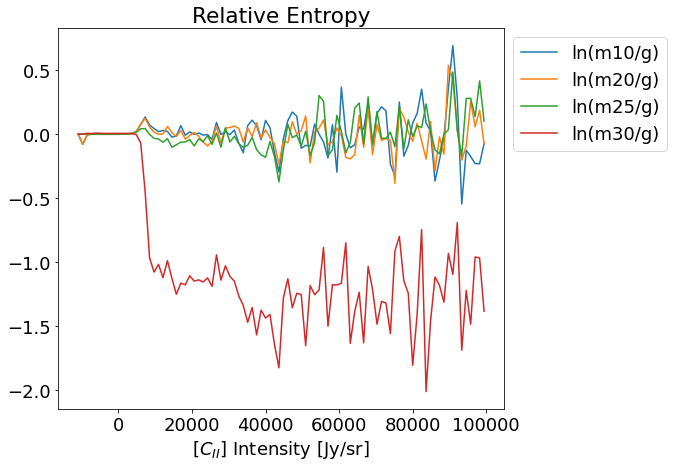

In [29]:
plt.plot(center, np.log(n_ng_10/n_g), label = 'ln(m10/g)')
plt.plot(center, np.log(n_ng_20/n_g), label = 'ln(m20/g)')
plt.plot(center, np.log(n_ng_25/n_g), label = 'ln(m25/g)')
plt.plot(center, np.log(n_ng_30/n_g), label = 'ln(m30/g)')
#plt.plot(center, np.log(n_ng_20/n_ng_10), label = 'm20/m10')
#plt.plot(center, np.log(n_ng_30/n_ng_20), label = 'm30/m20')
plt.title(r'Relative Entropy')
plt.xlabel(r'$[C_{II}]$ Intensity [Jy/sr]')
plt.legend(bbox_to_anchor = (1,1))
plt.savefig('may/rel_entropy.png')